#  Titanic Survival Prediction

In this Project we are going through the Popular Titanic Data set and predicting whether or not the person survived in the shipwrek. We will be using the Logistic regression model to train our data and make predictions, and then use cross_val_score to check the accuracy of our accuracy score. We will use train_test_split from Sklearn module to split the given data set into test data and train data and use 70 - 30 distribution for our model. So let us start.


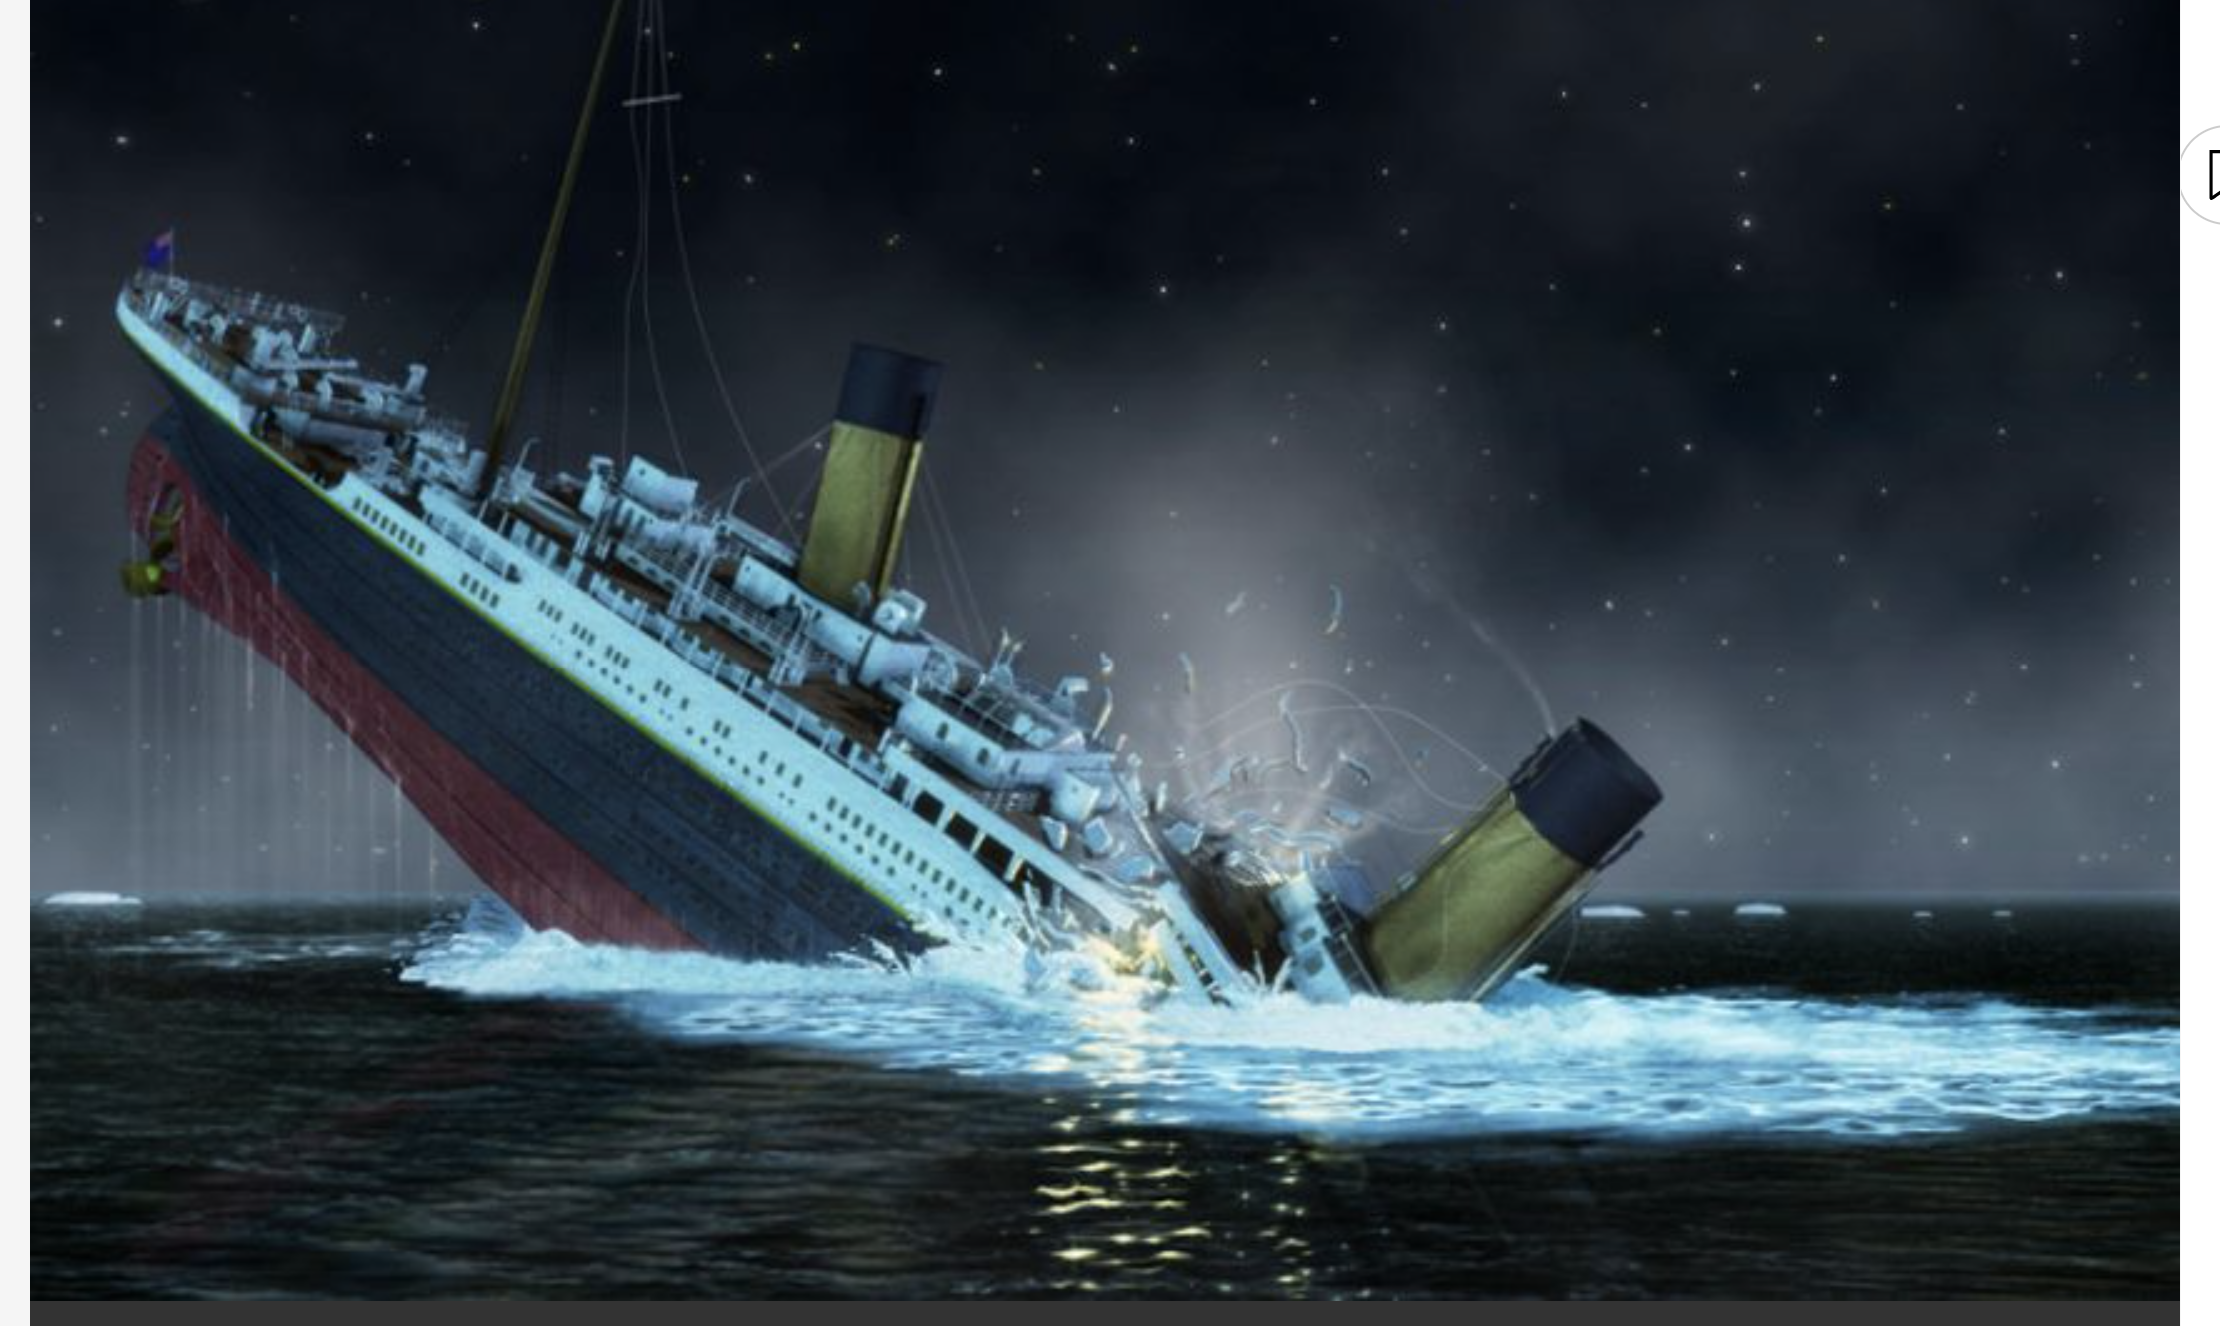

#### The Goal: Predict whether or not the passenger survived or not. 0 for not surviving, 1 for surviving

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Data Collection
We have downloaded the data set from kaggle using the link : https://www.kaggle.com/datasets/brendan45774/test-file/

There is only one csv file 'tested'. So we dowload it and start our processing.

In [3]:
#load the csv file to pandas dataframe

titanic_given_data = pd.read_csv('tested.csv')

In [4]:
# we will read the top 5 rows of the data to know our dataframe

titanic_given_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Describing the given data

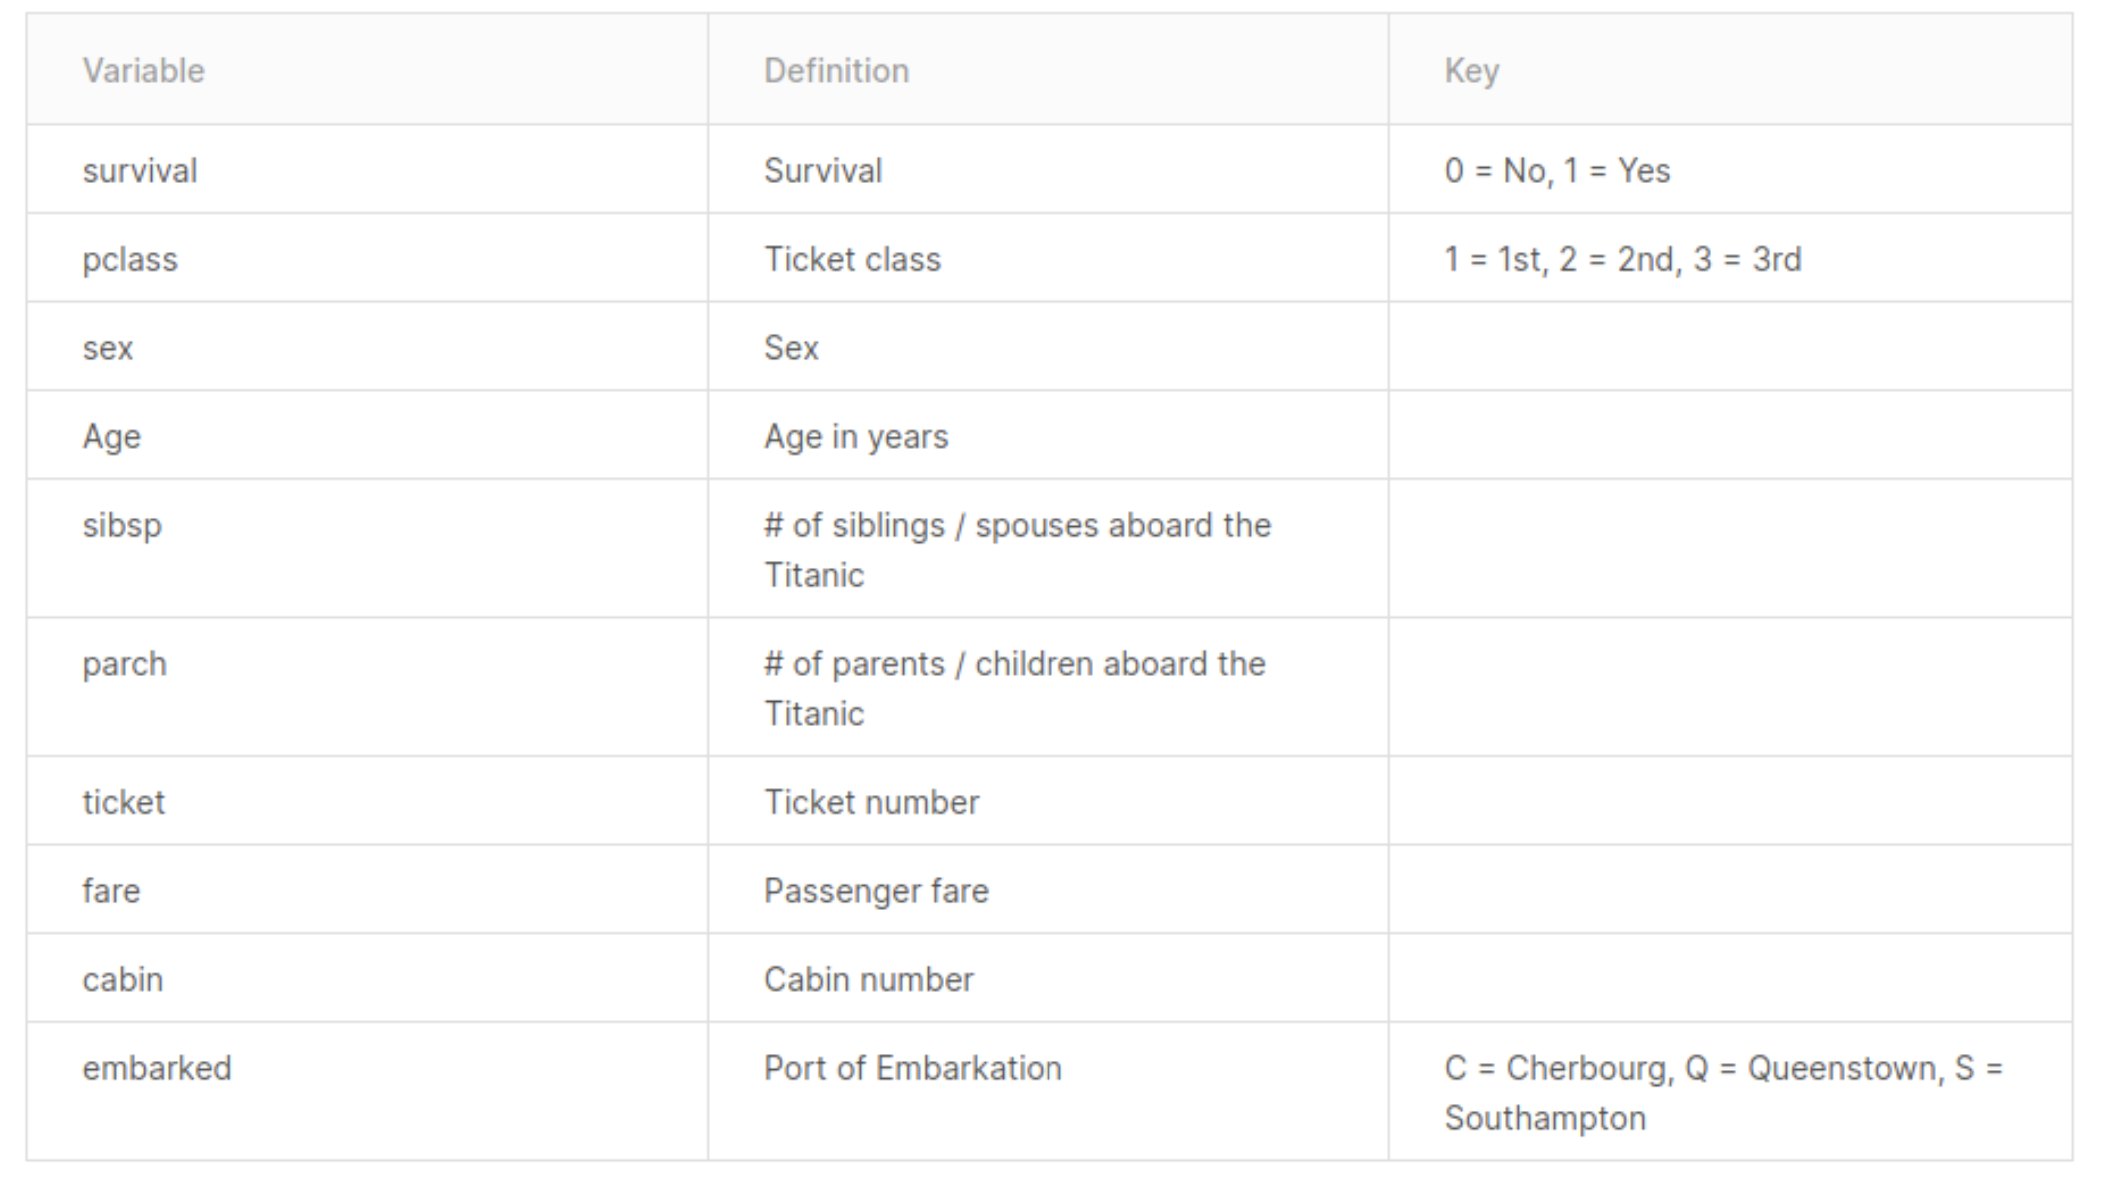

In [5]:
# rows and columns in the dataframe

titanic_given_data.shape

(418, 12)

In [6]:
# basic information about the data

titanic_given_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


We have total of 418 rows of data and 12 columns of type integer, object and float64 to work with.

In [7]:
# checking the count of missing values in each column

titanic_given_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

We have 3 columns which have missing values: Cabin , Age and Fare

### Handling missing values

In [8]:
# dropping the column 'cabin' from the dataset as its has maximum of missing values hence is of no use in analysis
# keeping the same name of the dataframe to reduce the confusion further
# since we are removing a column from the dataset we are specifying axis as 1

titanic_given_data = titanic_given_data.drop(columns='Cabin', axis=1)

In [9]:
#Replacing the null values in 'Age' column with the mean values

titanic_given_data['Age'].fillna(titanic_given_data['Age'].mean(), inplace=True)

In [10]:
#Replacing the null value in Fare column with the mean value as it is of float datatype, else we could have used mode

titanic_given_data['Fare'].fillna(titanic_given_data['Fare'].mean(), inplace=True)

In [11]:
# rechecking the missing values being handled correctly or not
titanic_given_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Data Analysis

In [12]:
# getting the stastical inference of the data

titanic_given_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#### Observations from the above summary statistics:
. There are total 418 passengers in a our given data set

. Since the survived column has discrete data, the mean gives us the number of people survived from 418 i.e. 36%

. Most of the passengers belonged to Pclass = 3 

. Maximum fare paid for a ticket was 512 however the fare price varied a lot as the standard deviation is of 55.84%
    

In [13]:
# number of people survived verses not survived
titanic_given_data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

Out of 418 passengers 266 passengers did not survive and 152 survived

### Data Visualisation

In [14]:
sns.set()

C:\Users\khyaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

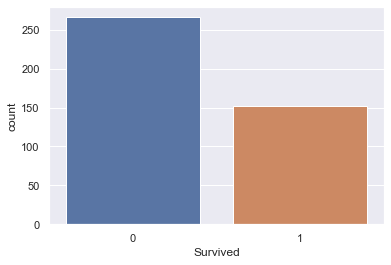

In [15]:
# count plot for 'Survived' column

sns.countplot('Survived', data = titanic_given_data)

In [16]:
# count of male and female passengers 
titanic_given_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

C:\Users\khyaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

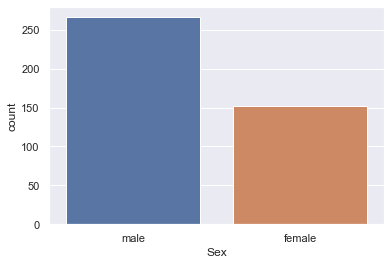

In [17]:
# count plot for 'Sex' column

sns.countplot('Sex', data = titanic_given_data)

As per the above inference we see that there are more male passengers on our data set

C:\Users\khyaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

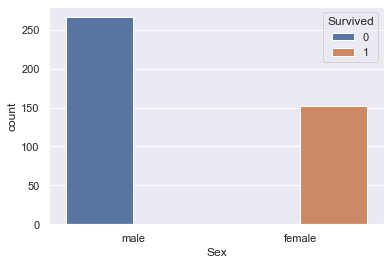

In [18]:
# comparing the number of survivors based on gender

sns.countplot('Sex', hue='Survived', data=titanic_given_data)

From the above visualisation we get to know that even though there are more male passengers, but the count of female being survived is more than male

C:\Users\khyaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

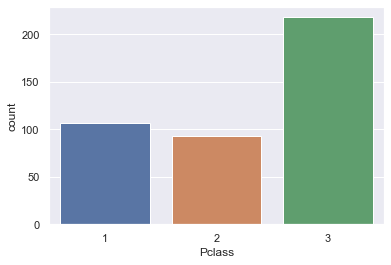

In [19]:
# count plot for 'Pclass' column

sns.countplot('Pclass', data = titanic_given_data)

Number of people in the 3rd class is more, followed by 1st class, and least number of people are in 2nd class

C:\Users\khyaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

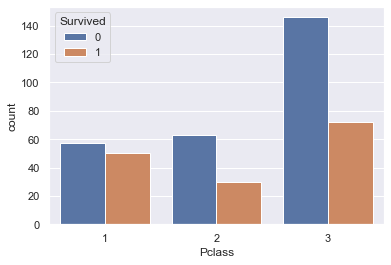

In [20]:
# comparing the number of survivors based on Pclass

sns.countplot('Pclass', hue='Survived', data=titanic_given_data)

In [21]:
# count of passengers embarked from a particular place 
titanic_given_data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

C:\Users\khyaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

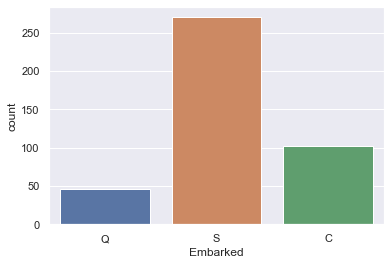

In [22]:
# count plot for 'Embarked' column

sns.countplot('Embarked', data = titanic_given_data)

From the above visulaisation we can see that maximum passengers embarked from 'S' i.e. Southhampton

,Embarked,Survived
1,Q,0.521739
0,C,0.392157
2,S,0.325926


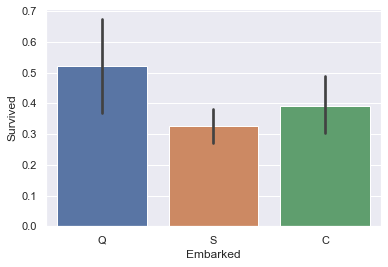

In [23]:
#Comparing the Embarked feature against Survived
sns.barplot(x='Embarked',y='Survived',data=titanic_given_data)
titanic_given_data[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

It seems that the passengers that embarked from port Queenstown had a higher rate of Survival at 53%. This could be either due to their Sex or socio-economic class

#### Encoding the categorical columns

In [24]:
# converting categorical columns

titanic_given_data.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

In [25]:
titanic_given_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


In the above table 'Survived' column is the Target and rest of the column are called 'Features'. Further we will seperate the Feature and the target to move ahead in analysis and we are dropping few columns like Name, Ticket and PassengerId.

### Seperating Target and Feature

In [26]:
X = titanic_given_data.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
# Since Survived is our Target column we will save it in a seperate variable

Y = titanic_given_data['Survived']

In [27]:
print(X)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]


In [28]:
print(Y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


### Splitting the data into training data and testing data

In [43]:
# Keeping the 30% of data in the test and 70% in train

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [44]:
print(X.shape, X_train.shape, X_test.shape)

(418, 7) (292, 7) (126, 7)


So, we can se that X_train contains 70% of the data, and X_test contains 30% of the data set

### Model Training

We are going to use Logistic Regression Model in this Anlalysis. So let us first understand Some thing about Logistic Regression

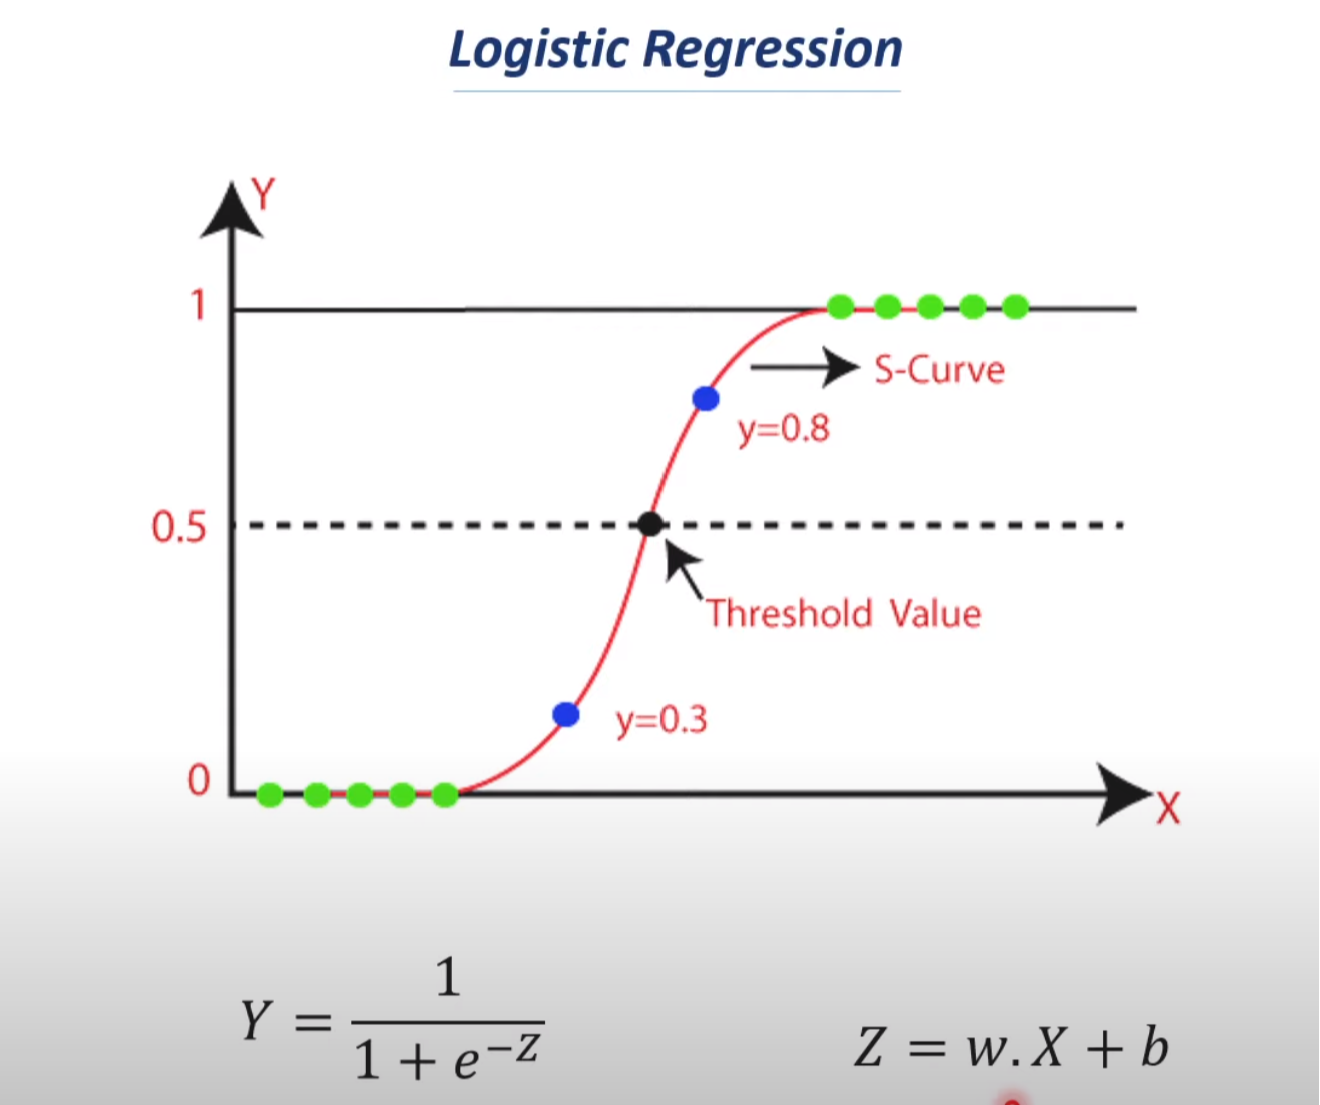

In the above figure 'Y' is called the 'Sigmoid Function' and 
in the equation Z = w.X + b, X - input features, Y - Prediction Probability, w - weights, b - biases

We need to find the value of Y. If Y value lies above the threshold i.e. 0.5 then it will be considered as 1 that means Passenger survived, and if the Y value lies below the threshold i.e. 0.5 then it will be considered as 0 that means not survived.

In our case Age, Sex, Pclass, Embarked, Fare are Input features
and we need to calculate the Y value, in our case is the survived value will give us the Prediction probability.

In [45]:
# training data accuracy
# Creating a variable to save the LogesticRegression function and fit our trainning data in the model

logreg = LogisticRegression()
logreg.fit(X_train,Y_train)

# getting the prediction score on our test data
y_pred = logreg.predict(X_test)

# calculation the accuracy score of our test data on train data

acc_logreg = round(accuracy_score(y_pred, Y_test) * 100, 2)
acc_logreg

C:\Users\khyaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


100.0

Our score also depends on how we had split our training data using train_test_split. We should also perform k-fold cross validation to get a more accurate score. Here we will be going with 5 folds.

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
cv_scores = cross_val_score(logreg,X,Y,cv=5)
 
np.mean(cv_scores)*100

C:\Users\khyaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\khyaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

100.0

So our Model gives a 100% accuracy score. Which is good.


Note: However with a real world data this might not be the case , as our dataset must be overfitted.

In case the Predictive analysis is good, please provide your valuable feedback. Thank you!